In [1]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 1.3MB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


# Get data

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Major files
listed = drive.ListFile({'q': "title contains 'masks.zip'"}).GetList()
for mask_file in listed:
  print('title {}, id {}'.format(mask_file['title'], mask_file['id']))

listed = drive.ListFile({'q': "title contains 'anon012.zip'"}).GetList()
for video_file in listed:
  print('title {}, id {}'.format(video_file['title'], video_file['id']))

listed = drive.ListFile({'q': "title contains 'anon012_miccai.zip'"}).GetList()
for H_file in listed:
  print('title {}, id {}'.format(H_file['title'], H_file['id']))

# scripts
listed = drive.ListFile({'q': "title contains 'scripts.zip'"}).GetList()
for scripts in listed:
  print('title {}, id {}'.format(scripts['title'], scripts['id']))

title masks.zip, id 1lBgLfSBD_8d0PxBSEI9uP7W3o-8bnZzW
title anon012.zip, id 1WAVYgCXz66iABg2RPf7hInVdhYnRlHGI
title anon012_miccai.zip, id 1Lr3tCrLLmmEdJJPiKglSfeUUbbVdcqtT
title scripts.zip, id 11NpBwyeqr2axFzQXZB6gIfWgbjZRpOjw


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = mask_file['id']

fname = os.path.join('/content', 'masks.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)


file_id = video_file['id']

fname = os.path.join('/content', 'video.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)


file_id = H_file['id']

fname = os.path.join('/content', 'H_files.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)


file_id = scripts['id']

fname = os.path.join('/content', 'scripts.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)

downloading to /content/masks.zip
downloading to /content/video.zip
downloading to /content/H_files.zip
downloading to /content/scripts.zip


In [ ]:
!unzip masks.zip
!unzip video.zip
!unzip H_files.zip
!unzip scripts.zip

Archive:  masks.zip
   creating: masks/
 extracting: masks/anon001_mask.png  
 extracting: masks/anon002_mask.png  
 extracting: masks/anon003_mask.png  
 extracting: masks/anon005_mask.png  
  inflating: masks/anon010_mask.png  
  inflating: masks/anon012_mask.png  
Archive:  video.zip
   creating: anon012/
  inflating: anon012/anon012_26161.png  
  inflating: anon012/anon012_26162.png  
  inflating: anon012/anon012_26163.png  
  inflating: anon012/anon012_26164.png  
  inflating: anon012/anon012_26165.png  
  inflating: anon012/anon012_26166.png  
  inflating: anon012/anon012_26167.png  
  inflating: anon012/anon012_26168.png  
  inflating: anon012/anon012_26169.png  
  inflating: anon012/anon012_26170.png  
  inflating: anon012/anon012_26171.png  
  inflating: anon012/anon012_26172.png  
  inflating: anon012/anon012_26173.png  
  inflating: anon012/anon012_26174.png  
  inflating: anon012/anon012_26175.png  
  inflating: anon012/anon012_26176.png  
  inflating: anon012/anon012_26177

# Get H_array

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
cv2.ocl.setUseOpenCL(False)
import sys
from PIL import Image
from pathlib import Path
from os import listdir
from scipy import optimize
import os
import shutil

In [ ]:
import scripts.flow_file_processing as fp
import scripts.registration_processing as rp
import scripts.visualize as vis
import scripts.transformation_processing as tp
import scripts.ssim_processing as sp
import scripts.config_project as config_project

## Resize images

In [ ]:
seq_name = "anon012"
frames_path = "/content/" + seq_name
fullImgDirPath = '/content/' + seq_name
transformation = "Affine"
mask_path = '/content/masks/' + seq_name + '_mask.png'
padding_size = 2500
is_exact = True
showImages = False

window_size = 1
frame_distance = 5

if is_exact:
  seq_config = config_project.seq_exact
else:
  seq_config = config_project.seq_extra

In [ ]:
seq_config

{'anon001': {'file_length': 400,
  'name': 'anon001',
  'start': 20,
  'v_crop_bottom': 0,
  'v_crop_top': 0},
 'anon002': {'file_length': 200,
  'name': 'anon002',
  'start': 120,
  'v_crop_bottom': 0,
  'v_crop_top': 0},
 'anon003': {'file_length': 50,
  'name': 'anon003',
  'start': 10,
  'v_crop_bottom': 0,
  'v_crop_top': 0},
 'anon005': {'file_length': 100,
  'name': 'anon005',
  'start': 20,
  'v_crop_bottom': 20,
  'v_crop_top': 60},
 'anon010': {'file_length': 100,
  'name': 'anon010',
  'start': 70,
  'v_crop_bottom': 70,
  'v_crop_top': 80},
 'anon012': {'file_length': 100,
  'name': 'anon006',
  'start': 80,
  'v_crop_bottom': 70,
  'v_crop_top': 80}}

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
fullImgPaths =  [ fullImgDirPath + '/' + f  for f  in sorted(listdir(fullImgDirPath))]

In [ ]:
v_crop_top = seq_config[seq_name]["v_crop_top"]
v_crop_bottom = seq_config[seq_name]["v_crop_bottom"]

In [ ]:
mask_im = fp.get_mask_im(fullImgPaths, mask_path, v_crop_top, v_crop_bottom)

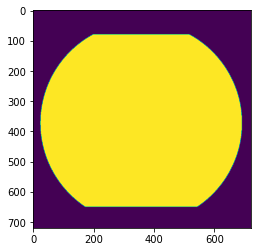

In [ ]:
vis.visualizeImg(mask_im)

In [ ]:
fullImgPaths = config_project.get_img_paths(fullImgPaths, seq_name, is_exact)

## Get H_array_from _miccai

In [ ]:
import scipy.io
miccai_path = '/content/' + seq_name + '_miccai/Fname_and_H.mat'
mat = scipy.io.loadmat(miccai_path)

In [ ]:
first_file = mat['Fname'][0]
last_file = mat['Fname'][-1]
print("first_file ",first_file )
print("last_file ", last_file)
print(len(fullImgPaths))
print(fullImgPaths[0])
print(fullImgPaths[-1])

first_file  [(array(['anon012_26512.png'], dtype='<U17'), array(['/data2/sophiabano2/Placenta_vesselSeg/MICCAI2020longdata/anon012_26161_26800/best_unet_resnet101/predicted_mask'],
       dtype='<U111'), array(['27-Jan-2021 17:33:29'], dtype='<U20'), array([[140021]], dtype=int32), array([[0]], dtype=uint8), array([[738183.73158565]]))            ]
last_file  [(array(['anon012_26711.png'], dtype='<U17'), array(['/data2/sophiabano2/Placenta_vesselSeg/MICCAI2020longdata/anon012_26161_26800/best_unet_resnet101/predicted_mask'],
       dtype='<U111'), array(['27-Jan-2021 17:33:40'], dtype='<U20'), array([[127959]], dtype=int32), array([[0]], dtype=uint8), array([[738183.73171296]]))            ]
100
/content/anon012/anon012_26241.png
/content/anon012/anon012_26340.png


**Ensure that this corresponds to expected results** 

In [ ]:
seq_length = seq_config[seq_name]["file_length"] 

H_array = mat['H_dense']
H_array = np.squeeze(H_array)
H_array = H_array [:seq_length]

In [ ]:
H_array.shape

(100,)

Test code
destImgPath = "/content/anon002/anon002_01631.png"
srcImgPath = "/content/anon002/anon002_01632.png"

srcImg = cv2.imread(srcImgPath)
srcImg = cv2.cvtColor(srcImg,cv2.COLOR_BGR2RGB)

destImg = cv2.imread(destImgPath)
destImg = cv2.cvtColor(destImg,cv2.COLOR_BGR2RGB)

vis.visualizeStitch(srcImg, destImg, H_array[0][:2, :],0, transformation, mask_im)

Visualize stitch


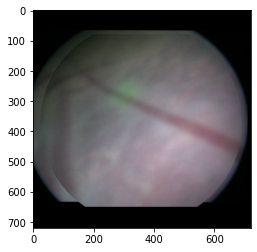

In [ ]:
destImgPath = fullImgPaths[0]
srcImgPath = fullImgPaths[1]

srcImg = cv2.imread(srcImgPath)
srcImg = cv2.cvtColor(srcImg,cv2.COLOR_BGR2RGB)

destImg = cv2.imread(destImgPath)
destImg = cv2.cvtColor(destImg,cv2.COLOR_BGR2RGB)

vis.visualizeStitch(srcImg, destImg, H_array[1],0, "Homography", mask_im)

## Get registration

In [ ]:
!mkdir globalRegistrationTransparent

In [ ]:
middle_num = len(fullImgPaths)//2
middle_num = middle_num - (middle_num%3)
middle_num

48

In [ ]:
H_affine = np.zeros( (len(H_array), 2,3))
for i in range(len(H_array)):
  H = H_array[i]
  H_affine[i] =  H[:2, :]

In [ ]:
H_global = rp.getHGlobal(H_affine, fullImgPaths, middle_num)

In [ ]:
def globalRegistration(img, imageName, index, padding, mask_im):
    ht, wd, cc= img.shape

    ww = wd + (2*padding)
    hh = ht + (2*padding)

    xx = (ww - wd) // 2
    yy = (hh - ht) // 2

    color = (0,0,0)

    img = cv2.bitwise_and(img, img, mask=mask_im)
    
    # vis.visualizeImg(img)

    T = np.copy(H_global[index])

    T[:2, 2] = T[:2, 2] + [xx , yy] 
    # print(T)

    result = cv2.warpPerspective(img, T, (ww, hh))

    # vis.visualizeImg(result)

    return result

In [ ]:
def do_global_registration(fullImgPaths, middle_num):
    for i in range(len(fullImgPaths)):
        imgPath = fullImgPaths[i];
        img = cv2.imread(imgPath)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
        imageName = Path(fullImgPaths[i]).name

        src = globalRegistration(img, imageName, i, padding_size, mask_im)
        rp.getTransparentImg(src, imageName)

In [ ]:
do_global_registration(fullImgPaths, middle_num)

In [ ]:
!zip -r /content/globalRegistration.zip /content/globalRegistrationTransparent

  adding: content/globalRegistrationTransparent/ (stored 0%)
  adding: content/globalRegistrationTransparent/anon012_26317.png (deflated 33%)
  adding: content/globalRegistrationTransparent/anon012_26270.png (deflated 33%)
  adding: content/globalRegistrationTransparent/anon012_26256.png (deflated 30%)
  adding: content/globalRegistrationTransparent/anon012_26272.png (deflated 32%)
  adding: content/globalRegistrationTransparent/anon012_26333.png (deflated 33%)
  adding: content/globalRegistrationTransparent/anon012_26334.png (deflated 34%)
  adding: content/globalRegistrationTransparent/anon012_26287.png (deflated 35%)
  adding: content/globalRegistrationTransparent/anon012_26311.png (deflated 34%)
  adding: content/globalRegistrationTransparent/anon012_26253.png (deflated 30%)
  adding: content/globalRegistrationTransparent/anon012_26307.png (deflated 35%)
  adding: content/globalRegistrationTransparent/anon012_26260.png (deflated 31%)
  adding: content/globalRegistrationTransparent/

In [ ]:
# import shutil
# shutil.rmtree('/content/globalRegistrationTransparent')

In [ ]:
2+2

4